In [2]:
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import os

In [3]:
os.chdir('C:\\Users\\chandan.malla\\Desktop\\Data Science_chandan\\Applied AI notes\\NLP\\Amazon Fine Food reviews')

con = sqlite3.connect('final2.sqlite')
raw_data = pd.read_sql_query('select * from reviews',con)
raw_data = raw_data.iloc[0:1000,:]


In [4]:
x = []
i = 0
for i in raw_data['Cleanedtext']:
    x.append(i.split())

# Motivation:
- We are trying to separate positive and negative review from each other

# [1] BOW

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

data_X = count_vect.fit_transform(raw_data['Cleanedtext'])

In [6]:
###Standardizing the Input to BOW

from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_data = std.fit_transform(data_X.toarray())

In [7]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2,perplexity=50,n_iter=1000)

tsne_data = model.fit_transform(std_data)



In [8]:
labels_Y = raw_data.iloc[0:1000,:]['Score']

In [9]:
tsne_df = pd.DataFrame(data=tsne_data,columns=('X_coordinate','y_coordinate'))

In [10]:
tsne_df['Score'] = labels_Y
tsne_df

,X_coordinate,y_coordinate,Score
0,2.675482,-0.347874,1
1,-6.960301,-2.861314,0
2,20.123682,-76.047203,1
3,-4.266398,-5.599398,0
4,0.573427,-4.513212,1
...,...,...,...
995,-2.042647,-4.286309,1
996,4.198836,-0.826633,1
997,-2.482398,7.967057,1
998,-2.426345,1.997560,1


C:\Users\chandan.malla\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


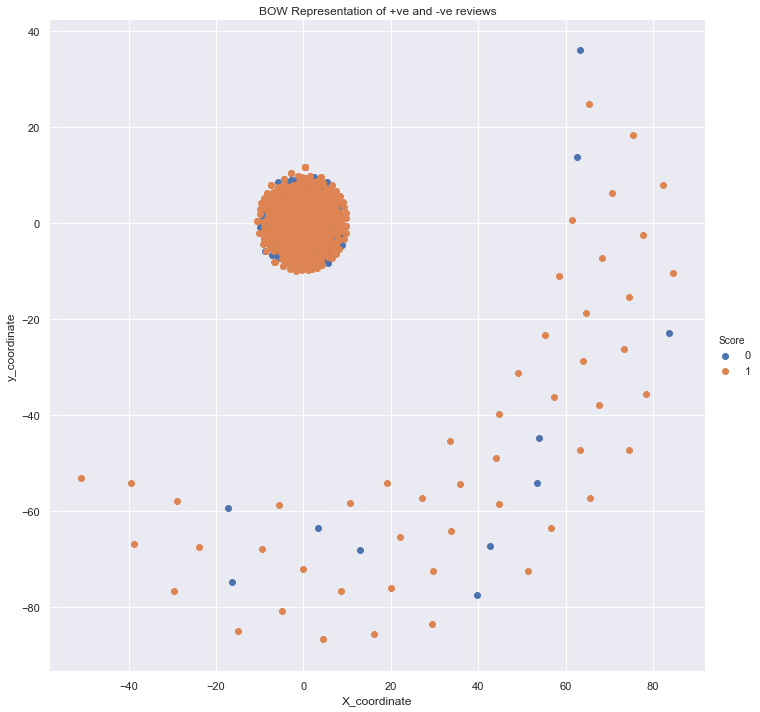

In [11]:
g= sns.FacetGrid(tsne_df, size=10,hue='Score')
plt.title('BOW Representation of +ve and -ve reviews')
g.map(plt.scatter, 'X_coordinate', 'y_coordinate').add_legend()
plt.show()

# Observation or Conclusion:
- Even after running multiple iteration of T-SNE , I am not able to reach a definite hyperplane

# Motivation:
- Let's try separating positive and negative review with  TF_IDF

# [2] TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()

data_X_tfidf = tfidf_vect.fit_transform(raw_data['Text'])

In [13]:
###Standardizing the Input to T-SNE

from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_data = std.fit_transform(data_X_tfidf.toarray())

In [14]:
from sklearn.manifold import TSNE

model_tfidf_tsne = TSNE(perplexity = 50,n_components = 2,n_iter=1000)

tsne_tfidf = model_tfidf_tsne.fit_transform(std_data)

In [15]:
tsne_tfidf_df = pd.DataFrame(data=tsne_tfidf,columns=('X_coordinate','y_coordinate'))
tsne_tfidf_df['Score'] = labels_Y

C:\Users\chandan.malla\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


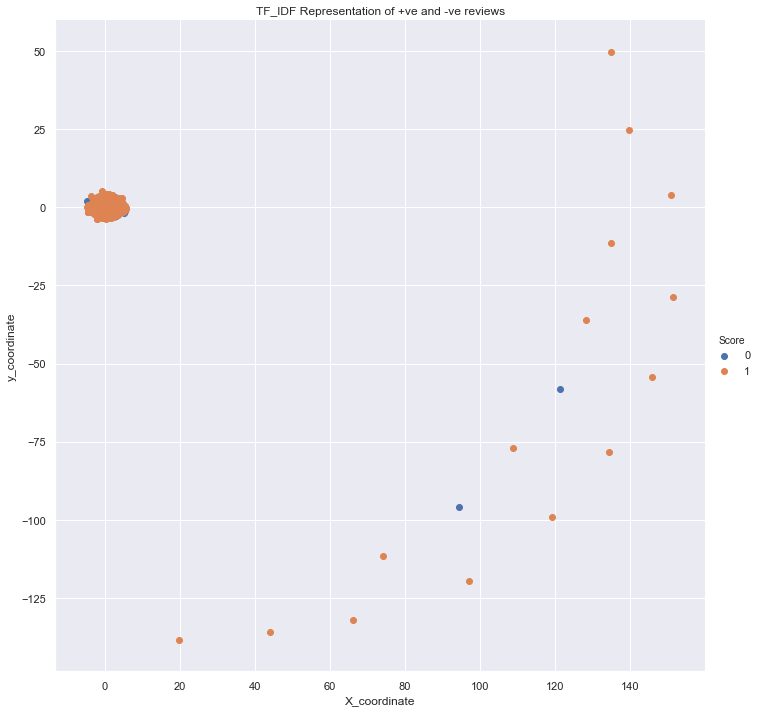

In [16]:
g= sns.FacetGrid(tsne_tfidf_df, size=10,hue='Score')
plt.title('TF_IDF Representation of +ve and -ve reviews')
g.map(plt.scatter, 'X_coordinate', 'y_coordinate').add_legend()
plt.show()


# Observation:
- Even after running multiple iteration of T-SNE on TFIDF, I am not able to reach a definite hyperplane



# Motivation:
- Let's try separating positive and negative review with  W2V

# Word 2 Vec

In [17]:
list_of_sentence = [ ]

##We need to clear data first of punctuation, html,upper case letter
for sent in raw_data['Text']:
    list_of_sentence.append(sent.split())


In [18]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors ##to load google's model

w2v_model = Word2Vec(list_of_sentence,min_count=5,size=50,workers=4)
#min_count- denotes not to take words with less than 5 count
#size- size of vector
#workers- no. of core
print(w2v_model.wv.most_similar('great'))

[('or', 0.9998414516448975), ("I'm", 0.9998406767845154), ('They', 0.9998376965522766), ('with', 0.9998273849487305), ("it's", 0.9998273849487305), ('coffee', 0.9998255372047424), ('just', 0.9998247623443604), ('good', 0.9998245239257812), ('very', 0.9998177886009216), ('like', 0.9998166561126709)]


In [19]:
w2v_model.wv['great']

array([ 0.2844372 ,  0.48757038,  0.26472503, -0.491273  ,  0.02987512,
        0.6778244 , -0.18499407,  0.6004405 , -0.43842804, -0.7575177 ,
        0.93505377, -0.56974673, -0.27014023,  0.7573875 , -0.26377508,
       -0.5015949 ,  0.46243843, -0.2488287 , -0.70169663,  0.22562581,
       -0.11046607, -0.14677297,  0.552348  , -0.0914789 , -0.17633025,
       -0.04313186,  1.6086632 ,  0.61253244, -0.10988557, -0.01923423,
       -0.38349095,  0.2817018 , -0.22969334,  0.11110828, -0.17671092,
       -0.19186741, -0.11869689, -0.7197202 , -0.20241047,  0.46067995,
       -0.38248214, -0.8216812 , -0.16480045, -0.10567824,  0.3147542 ,
       -0.19423352,  0.6784408 , -0.15735044, -0.80560035,  0.36271456],
      dtype=float32)

# Observation:
- W2V generates vectors for word and not for whole document, so it can not be used to separate positive and negative reviews.

# Motivation:
- Let's try separating positive and negative review with AVG W2V

# AVG Word2VEC

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()

data_X_tfidf = tfidf_vect.fit_transform(raw_data['Text'])

In [21]:
sent_vectors = [ ];

for sent in list_of_sentence:
    sent_vec = np.zeros(50)
    cnt_words = 0;
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words +=1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
    

        

In [22]:
from sklearn.manifold import TSNE

tsne_w2v = TSNE(n_components = 2,perplexity = 50 , n_iter=4000)

tsne_w2v_model = tsne_w2v.fit_transform(sent_vectors)

In [23]:
tsne_w2v_df = pd.DataFrame(data=tsne_w2v_model,columns=('X_coordinate','y_coordinate'))
tsne_w2v_df['Score'] = labels_Y

C:\Users\chandan.malla\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


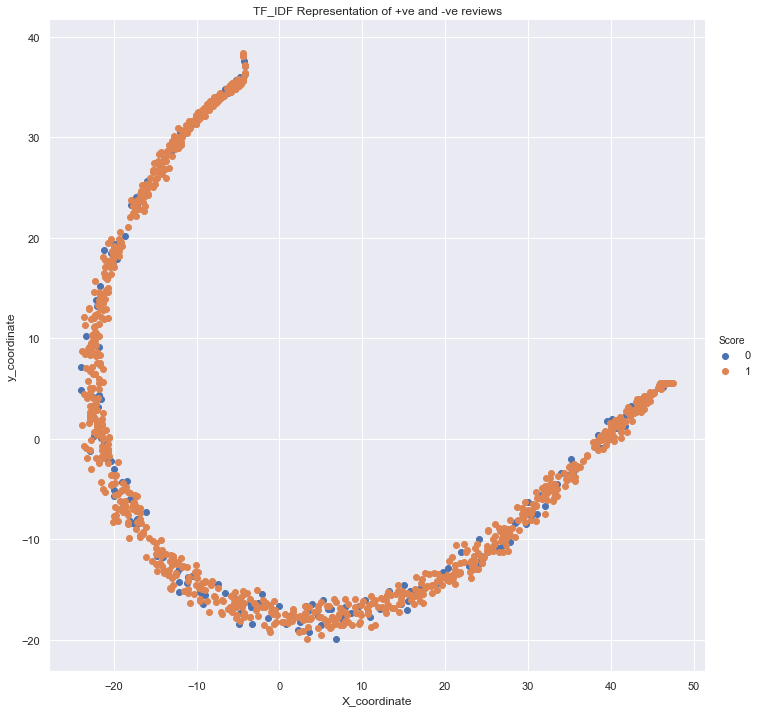

In [24]:
g= sns.FacetGrid(tsne_w2v_df, size=10,hue='Score')
plt.title('TF_IDF Representation of +ve and -ve reviews')
g.map(plt.scatter, 'X_coordinate', 'y_coordinate').add_legend()
plt.show()


# Observation:
- No Clear linearity in AVG W2V also


# Motivation:
- Let's try separating positive and negative review with  AVG TFIDF


In [27]:
sent_vectors = [ ];
feature_name = tfidf_vect.get_feature_names()

row = 0
for sent in list_of_sentence:
    sent_vec = np.zeros(50)
    weight = 0;
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            tfidf_value = data_X_tfidf[row,feature_name.index(word)]
            sent_vec += vec * tfidf_value
            weight += tfidf_value
        except:
            pass
    sent_vec /= weight
    sent_vectors.append(sent_vec)
    row += 1
sent_vectors = np.nan_to_num(sent_vectors)


C:\Users\chandan.malla\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [28]:
from sklearn.manifold import TSNE

tsne_w2v_tfidf = TSNE(n_components = 2,perplexity = 50 , n_iter=4000)

tsne_w2v_tfidf_model = tsne_w2v_tfidf.fit_transform(sent_vectors)

In [29]:
# TF-IDF weighted Word2Vec
tfidf_feat = tfidf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sentence: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = tsne_tfidf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

C:\Users\chandan.malla\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
tfidf_vect.get_feature_names()

In [198]:
def solutions(string):
    length = len(string)
    i=0
    j=1
    count=0
    while i <length:
        
        while j<length:
            if (string[i]==string[j]):
                #print(i,j,string[i],string[j])
                if( string[i:j] == string[j:j+len(string[i:j])] ):
                    print(string[i],string[j],i,j)
                    count = count+1  
                    temp = j+len(string[i:j])
                    break
            j=j+1
        print('temp = ',temp)
        i = temp
        j= 
    return count
        

In [200]:
solutions('abcabcabc')

a a 0 3
temp =  6
a a 6 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3


a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
temp =  3
a a 3 3
te

KeyboardInterrupt: 

In [201]:
string='abcabc'
string:

SyntaxError: invalid syntax (<ipython-input-201-9e1366f559ef>, line 2)

In [285]:
def solutions(s):
    string=s
    dict = {}
    for i in string:
        dict[i] = 0
    for i in string:
        dict[i] += 1
    return dict.values()

In [286]:
solutions('abccbaabccba')

dict_values([4, 4, 4])

In [276]:
p

4

In [327]:
def solution(s):
    string=s
    for x in range(len(string)+1):
        if (x*string.count(string[:x])==len(string)):
            return string.count(string[:x])

In [330]:
solution('abababababab')

6

In [311]:
from __future__ import division
from __future__ import print_function

def solution(s):

    length_of_str = len(s)

    for i in range(1,length_of_str+1):

        cmp_str = s[:i]

        count = s.count(cmp_str)

        if count*i == length_of_str:
            print()
            return count

In [317]:
solution('abcabc')

2

In [322]:
str = 'abcabc'


In [323]:
for i in range(len(str)+1):
    print(str[i])

a
b
c
a
b
c


IndexError: string index out of range

In [503]:
def solutions(x,y):
    A=np.zeros((x,y))
    p=1
    for i in range(0,x+1):
        for j in range(0,i):
            print('i=',i,'j=',j,'p=',p)
            A[i-1][j] = p
            p=p+1
    
            
        
        

In [504]:
solutions(4,4)

i= 1 j= 0 p= 1
i= 2 j= 0 p= 2
i= 2 j= 1 p= 3
i= 3 j= 0 p= 4
i= 3 j= 1 p= 5
i= 3 j= 2 p= 6
i= 4 j= 0 p= 7
i= 4 j= 1 p= 8
i= 4 j= 2 p= 9
i= 4 j= 3 p= 10


In [619]:
x=2
y=2
A=np.zeros((x,y))
p=1
i=0
j=0
while i <x:
    j=0
    print('i loop','i=',i,'j=',j,'p=',p)
    A[j][i]=p
    p=p+1
    j=j+1
    while j<i:
        print('JJ loop','i=',i+1,'j=',j,'p=',p)
        A[i+1][j] = p
        p =p+1
        j=j+1
        
    i=i+1
        
        

i loop i= 0 j= 0 p= 1
i loop i= 1 j= 0 p= 2


In [620]:
A

array([[1., 2.],
       [0., 0.]])

In [495]:
B[::-1]

array([9., 6., 0., 0.])

In [621]:
12//2

6

In [623]:
def solution(x, y):
    y_coord = y
    x_coord = x
    difference = y_coord - 1
    border = x_coord + difference
    value = border * (border + 1) // 2
    value -= difference
    return str(value)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)